AVIATION ACCIDENTS FROM 1919 TO 2023

Problem Statment: 

reason for the increased amount of plane accidents and how to resolve the issues,plane type with most amount and those with the list of accidents inorder to start a new aircraft business

Solution:

identify the cause of every accident that occured within that period and establish a permanent solution for example avoiding places with a bad wether condition to prevent crashing of the planes,
 avoiding places with high rate of insecurities or increasing security messures to avoid cases like highjacking of the planes and many otheres.
 identifying the plane type with most amount of accidents inorder to avoid buying them and we pick those with the list amount of accidents.


Objectives:

we will be able to identify ;
the cause of the accidents.
the place with most amount of accidents.
the number of survivals and nonsurvivals in each category of the accidents.


Data Defination

the dataset contains different dates of when the accidents occured between the year 1919-2023,the type and the operation of the planes involved in the accidents,the areas in which the accidents occured,the fatality involved in each accident,the category in which each accident was involved and the survival rate in each category of the accidents.

Data Cleaning

In [2]:
#importing pandas
import pandas as pd
# importing the dataset
df_accidents=pd.read_csv("./aviation-accident-data-2023-05-16.csv")
# use .head() inorder to get access to the 1st few rows of the dataset
df_accidents.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [3]:
#using .info() to get a summary of the dataframe and also enable us to identify the columns with missing data
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


in the above we identify that the dataset has 9columns,23967 rows,23966 indexs and the columns contain strings. 
To iddentfy missing data 
the columns registration,operator,fatalities and location all have missing data since their non-null values don't add up to the total number of colums which is 23967.


In [4]:
#ditecting NaNs
df_accidents.isna().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

In [5]:
#filling the missing values using .fillna() 
missing_cols=['registration','operator','fatalities','location']
df_accidents[missing_cols]=df_accidents[missing_cols].fillna('Unknown')
df_accidents.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [6]:
#to find if there are any duplicates and how many they are in the dataset
#true means duplicate and false means not a duplicate
df_accidents.duplicated().value_counts()

False    23852
True       115
dtype: int64

In [7]:
#using .drop_duplicates() to remove duplicates
#after using .drop_duplicates() we can see that there are no more duplicates in the dataset
df_accidents=df_accidents.drop_duplicates()
df_accidents.duplicated().value_counts()

False    23852
dtype: int64

In [8]:
# to save the cleaned dataset to a new csv file
df_accidents.to_csv("cleaned_aviation_accident_data.csv", index=False)

Data Analysis

In [9]:
# importing numpy
import numpy as np
#importing pandas
import pandas as pd
#loading the data
df_accidents=pd.read_csv("./cleaned_aviation_accident_data.csv")

In [10]:
df_accidents.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,Unknown,Unknown,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,Unknown,Unknown,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,Unknown,Unknown,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,Unknown,Soviet AF,Unknown,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [11]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23852 entries, 0 to 23851
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23852 non-null  object
 1   type          23852 non-null  object
 2   registration  23852 non-null  object
 3   operator      23852 non-null  object
 4   fatalities    23852 non-null  object
 5   location      23852 non-null  object
 6   country       23852 non-null  object
 7   cat           23852 non-null  object
 8   year          23852 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [12]:
#to find unique count in plane type
df_accidents["type"].nunique()

3201

In [13]:
#to find unique count in operator
df_accidents["operator"].nunique()

6017

In [14]:
#to find unique count in location of the accidents
df_accidents["location"].nunique()

14608

plotting of graphs in order to know the rate at which the accidents occur in a spean of one year or 12 months.in order to beable to do this we have to import matplotlib

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


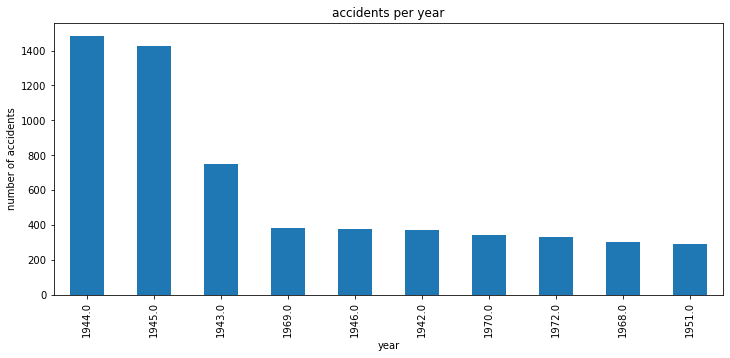

In [16]:
#the rate at which accidents occured in the 1st 10 years
df_accidents['date']=pd.to_datetime(df_accidents['date'], errors='coerce')
df_accidents['year']=df_accidents['date'].dt.year
df_accidents['month']=df_accidents['date'].dt.month
df_accidents_per_year=df_accidents['year'].value_counts().head(10)
plt.figure(figsize=(12,5))
df_accidents_per_year.plot(kind='bar')
plt.title('accidents per year')
plt.xlabel('year')
plt.ylabel('number of accidents')
plt.show()

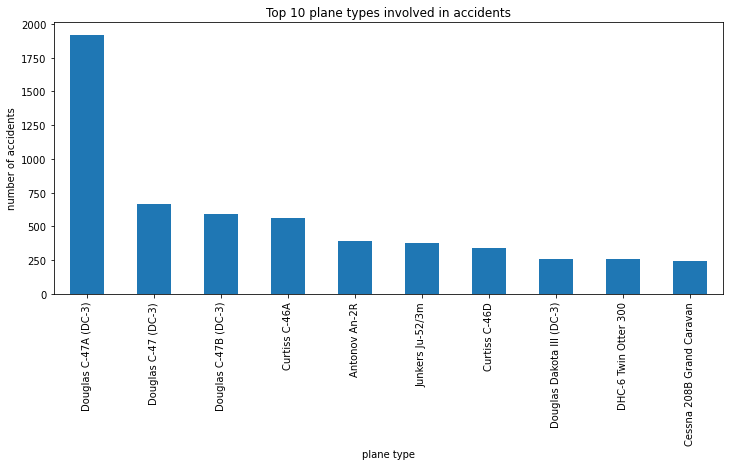

In [17]:
# top 10 plane types involved in the accidents
df_accidents_type=df_accidents['type'].value_counts().head(10)
plt.figure(figsize=(12,5))
df_accidents_type.plot(kind='bar')
plt.title('Top 10 plane types involved in accidents')
plt.xlabel('plane type')
plt.ylabel('number of accidents')
plt.show()

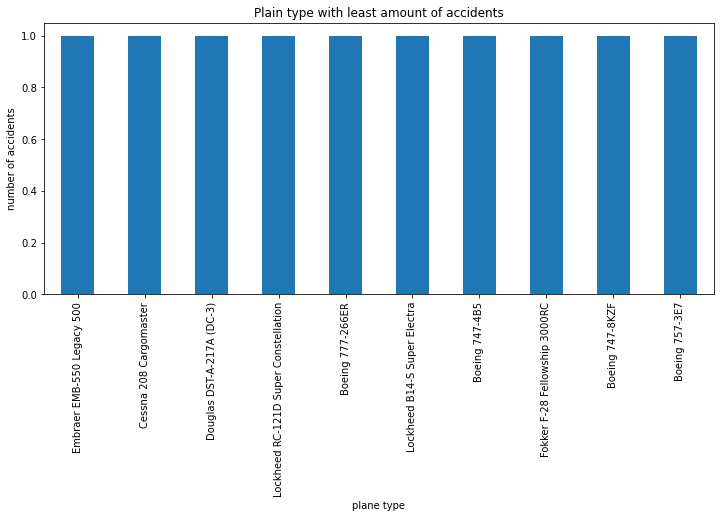

In [18]:
#plain type with list amount of accidents
df_accidents_type_least=df_accidents['type'].value_counts().tail(10)
plt.figure(figsize=(12,5))
df_accidents_type_least.plot(kind='bar')
plt.title('Plain type with least amount of accidents')
plt.xlabel('plane type')
plt.ylabel('number of accidents')
plt.show()

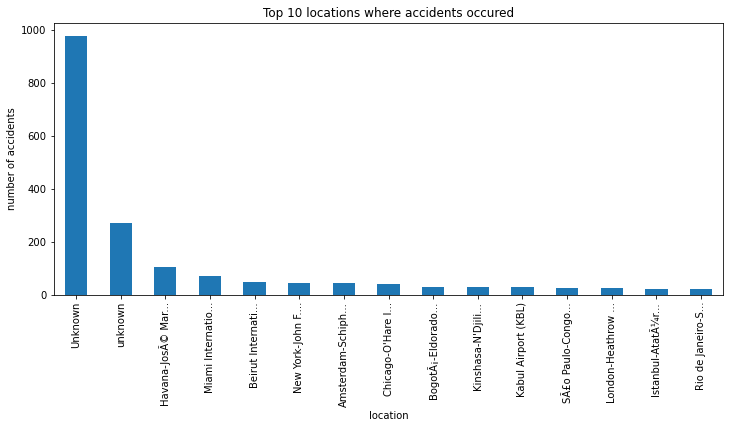

In [19]:
# to know the top location where the accidents occured
df_accidents_location=df_accidents['location'].value_counts().head(15)
plt.figure(figsize=(12,5))
df_accidents_location.plot(kind='bar')
plt.title('Top 10 locations where accidents occured')
plt.xlabel('location')
plt.ylabel('number of accidents')
plt.show()

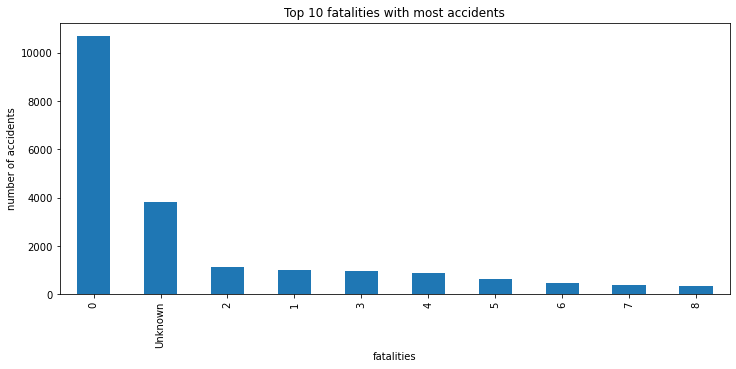

In [ ]:
#in order to find the fatality with most accidents
df_accidents_fatalities=df_accidents['fatalities'].value_counts().head(10)
plt.figure(figsize=(12,5))
df_accidents_fatalities.plot(kind='bar')
plt.title('Top 10 fatalities with most accidents')
plt.xlabel('fatalities')
plt.ylabel('number of accidents')
plt.show()

Recommendation

increase security measures to prevent highjacking cases.
always ensure that the plane is well serviced before any take off.
avoid places with bad weather condition to avoid accidents caused by weather.
avoid plane type with high amount of accidents such as douglas C and pick those with least amount of accidents.


Conclusion

buy planes such as EMB-500 legacy 500 ,cessna 208 cargomaster & boeing 757-3E7 since they have least amount of accidents.
this data shows that most accident occur in the unknown places,plane type douglas C has the most amount of accidents,there were 0 death in most of the accidents in this dataset.there were few major deaths in this dataset.